In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
import seaborn as sns
import pandas as pd
import os

from folder_paths import *

### Load fit parameters and scan infos

In [2]:
### LOAD FIT OUT ###

# get file names

g2_fit_files = os.listdir(g2fit_folder)
g2_fit_files.sort()
g2_fit_files = [f for f in g2_fit_files if f.startswith('g2fit_')]

# LOAD g2fit DATA
g2_fit = pd.DataFrame()
for f in g2_fit_files:
    df = pd.read_csv(os.path.join(g2fit_folder, f), comment='#')                                            # load data
    scan_number = f.split('_Q=')[0][6:]                                                                     # get scan number from file name (ex: g2fit_Ta2O5_2.5um_0002_0004_Q=2.0_dq=0.01 -> Ta2O5_2.5um_0002_0004)
    df.index = [scan_number] * len(df)                                                                      # add scan number as index
    g2_fit = pd.concat([g2_fit, df], axis=0)                                                                # append to g2_fit dataframe

g2_fit.index.name = 'scan'  # set index name to 'scan'

# LOAD linear g2 data
g2_files = os.listdir(g2_folder)

#f
display(g2_fit)

,t,Q,dQ,tau,beta,c,y0,dtau,dbeta,dc,dy0
scan,,,,,,,,,,,
Ta2O5_2.5um_0002_0004,999.99955,2.00,0.01,1219.740860,1.461450,0.020712,1.003192,5.479038,0.006725,0.000088,0.000075
Ta2O5_2.5um_0002_0004,2999.99920,2.00,0.01,681.958672,1.328237,0.019019,1.004724,1.314431,0.005097,0.000039,0.000019
Ta2O5_2.5um_0002_0004,4999.99940,2.00,0.01,541.441562,1.205650,0.019855,1.003712,1.188119,0.004942,0.000043,0.000017
Ta2O5_2.5um_0002_0004,6999.99960,2.00,0.01,432.237819,1.228756,0.019664,1.003574,0.970764,0.004859,0.000041,0.000011
Ta2O5_2.5um_0002_0004,8999.99980,2.00,0.01,375.377703,1.191354,0.019562,1.003458,1.082140,0.005656,0.000050,0.000012
Ta2O5_2.5um_0002_0004,10999.99945,2.00,0.01,330.830492,1.169854,0.019711,1.003587,1.013060,0.005614,0.000051,0.000010
Ta2O5_2.5um_0002_0004,12999.99910,2.00,0.01,343.536772,1.170655,0.019229,1.003700,0.986361,0.005322,0.000047,0.000010
Ta2O5_2.5um_0002_0004,14999.99930,2.00,0.01,330.596731,1.183168,0.019144,1.003680,0.991600,0.005616,0.000049,0.000010
Ta2O5_2.5um_0002_0004,16520.84995,2.00,0.01,348.183111,1.231413,0.018593,1.003942,1.505817,0.009977,0.000084,0.000043


### Load g2

In [5]:
g2_files = os.listdir(g2_folder)
g2_files.sort()
g2_files = [f for f in g2_files if f.startswith('g2_')]

t_g2, g2 = {}, {}
for f in g2_files:
    t_g2[f.split('_Q=')[0][3:]] = np.load(os.path.join(g2_folder, f), allow_pickle=True)['t_g2'].item()
    g2[f.split('_Q=')[0][3:]] = np.load(os.path.join(g2_folder, f), allow_pickle=True)['g2'].item()


### Cfr. between sample mounted towards beam (Ta2O5_2.5um dataset 2 scan 4) and rotated by 180 deg (Ta2O5_2.5um dataset 3 scan 9)

In [12]:
16e6/60**2/1000*3+1

14.333333333333334

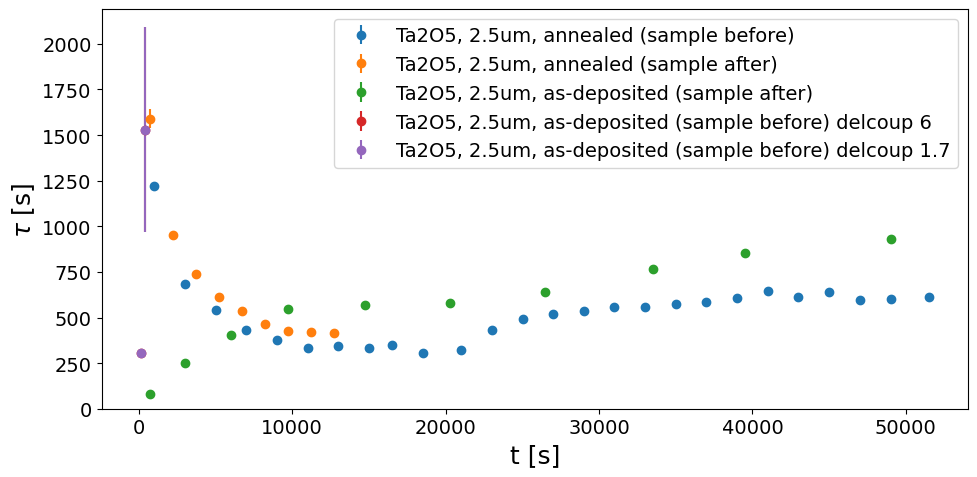

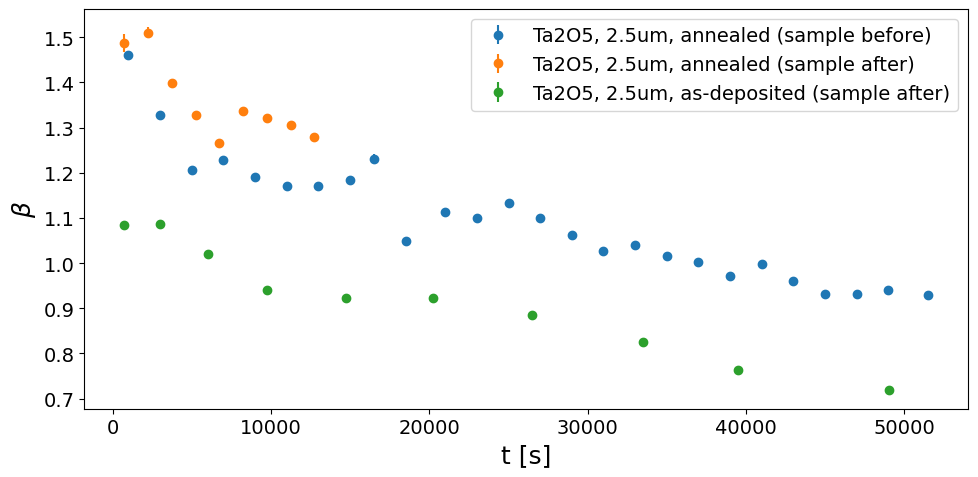

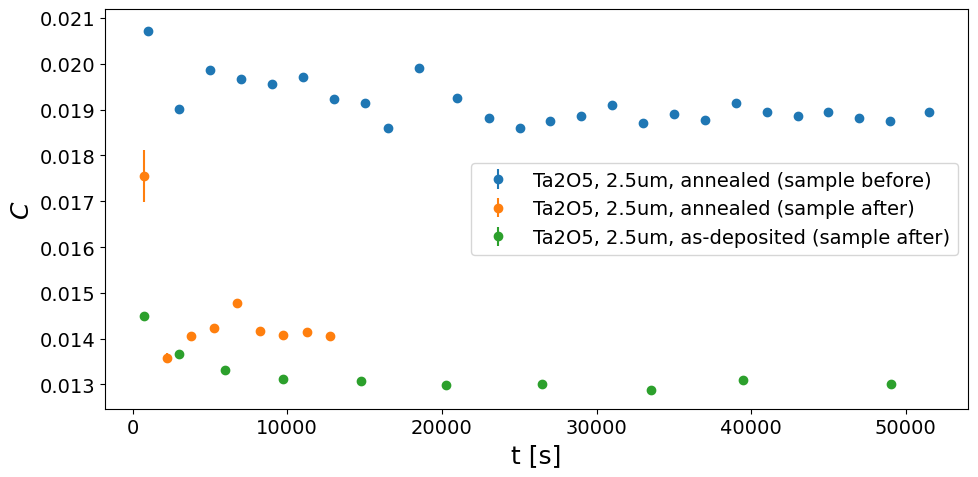

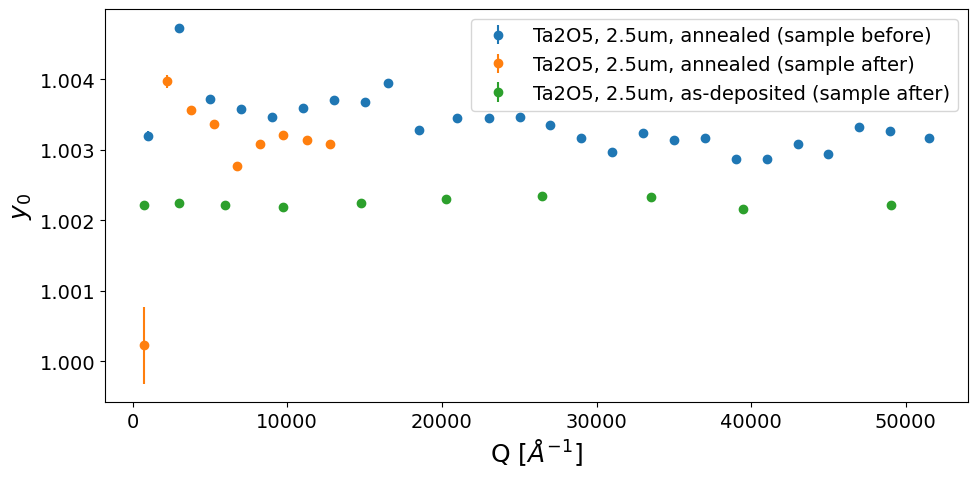

In [ ]:
#################################################
idx_1 = 'Ta2O5_2.5um_0002_0004'
idx_2 = 'Ta2O5_2.5um_0003_0009'
idx_3 = 'Ta2O5_2.5um_asdep_0001_0006'
idx_4 = 'Ta2O5_2.5um_asdep_0004_0002'
idx_4 = 'Ta2O5_2.5um_asdep_0004_0005'
#################################################


# tau
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(g2_fit.loc[idx_1]['t'], g2_fit.loc[idx_1]['tau'], yerr=g2_fit.loc[idx_1]['dtau'], fmt='o', label = 'Ta2O5, 2.5um, annealed (sample before)')
ax.errorbar(g2_fit.loc[idx_2]['t'], g2_fit.loc[idx_2]['tau'], yerr=g2_fit.loc[idx_2]['dtau'], fmt='o', label = 'Ta2O5, 2.5um, annealed (sample after)')
ax.errorbar(g2_fit.loc[idx_3]['t'], g2_fit.loc[idx_3]['tau'], yerr=g2_fit.loc[idx_3]['dtau'], fmt='o', label = 'Ta2O5, 2.5um, as-deposited (sample after)')
ax.errorbar(g2_fit.loc[idx_4]['t'], g2_fit.loc[idx_4]['tau'], yerr=g2_fit.loc[idx_4]['dtau'], fmt='o', label = 'Ta2O5, 2.5um, as-deposited (sample before) delcoup 6')
#ax.errorbar(g2_fit.loc[idx_4]['t'], g2_fit.loc[idx_4]['tau'], yerr=g2_fit.loc[idx_4]['dtau'], fmt='o', label = 'Ta2O5, 2.5um, as-deposited (sample before) delcoup 1.7')
##plt.yscale('log')
plt.xlabel(r't [s]')
plt.ylabel(r'$\tau$ [s]')
plt.legend()
plt.ylim(0)
plt.tight_layout(), plt.show();

# beta
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(g2_fit.loc[idx_1]['t'], g2_fit.loc[idx_1]['beta'], yerr=g2_fit.loc[idx_1]['dbeta'], fmt='o', label = 'Ta2O5, 2.5um, annealed (sample before)')
ax.errorbar(g2_fit.loc[idx_2]['t'], g2_fit.loc[idx_2]['beta'], yerr=g2_fit.loc[idx_2]['dbeta'], fmt='o', label = 'Ta2O5, 2.5um, annealed (sample after)')
ax.errorbar(g2_fit.loc[idx_3]['t'], g2_fit.loc[idx_3]['beta'], yerr=g2_fit.loc[idx_3]['dbeta'], fmt='o', label = 'Ta2O5, 2.5um, as-deposited (sample after)')
#plt.xscale('log')
plt.xlabel(r't [s]')
plt.ylabel(r'$\beta$')
plt.legend()
plt.tight_layout(), plt.show();

# C
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(g2_fit.loc[idx_1]['t'], g2_fit.loc[idx_1]['c'], yerr=g2_fit.loc[idx_1]['dc'], fmt='o', label = 'Ta2O5, 2.5um, annealed (sample before)')
ax.errorbar(g2_fit.loc[idx_2]['t'], g2_fit.loc[idx_2]['c'], yerr=g2_fit.loc[idx_2]['dc'], fmt='o', label = 'Ta2O5, 2.5um, annealed (sample after)')
ax.errorbar(g2_fit.loc[idx_3]['t'], g2_fit.loc[idx_3]['c'], yerr=g2_fit.loc[idx_3]['dc'], fmt='o', label = 'Ta2O5, 2.5um, as-deposited (sample after)')
#plt.yscale('log')
plt.xlabel(r't [s]')
plt.ylabel(r'$C$')
plt.legend()
plt.tight_layout(), plt.show();

# y0
fig, ax = plt.subplots(figsize=(10, 5))
ax.errorbar(g2_fit.loc[idx_1]['t'], g2_fit.loc[idx_1]['y0'], yerr=g2_fit.loc[idx_1]['dy0'], fmt='o', label = 'Ta2O5, 2.5um, annealed (sample before)')
ax.errorbar(g2_fit.loc[idx_2]['t'], g2_fit.loc[idx_2]['y0'], yerr=g2_fit.loc[idx_2]['dy0'], fmt='o', label = 'Ta2O5, 2.5um, annealed (sample after)')
ax.errorbar(g2_fit.loc[idx_3]['t'], g2_fit.loc[idx_3]['y0'], yerr=g2_fit.loc[idx_3]['dy0'], fmt='o', label = 'Ta2O5, 2.5um, as-deposited (sample after)')
#plt.yscale('log')
plt.xlabel(r'Q [$\AA^{-1}$]')
plt.ylabel(r'$y_0$')
plt.legend()
plt.tight_layout(), plt.show();



## g2 plots

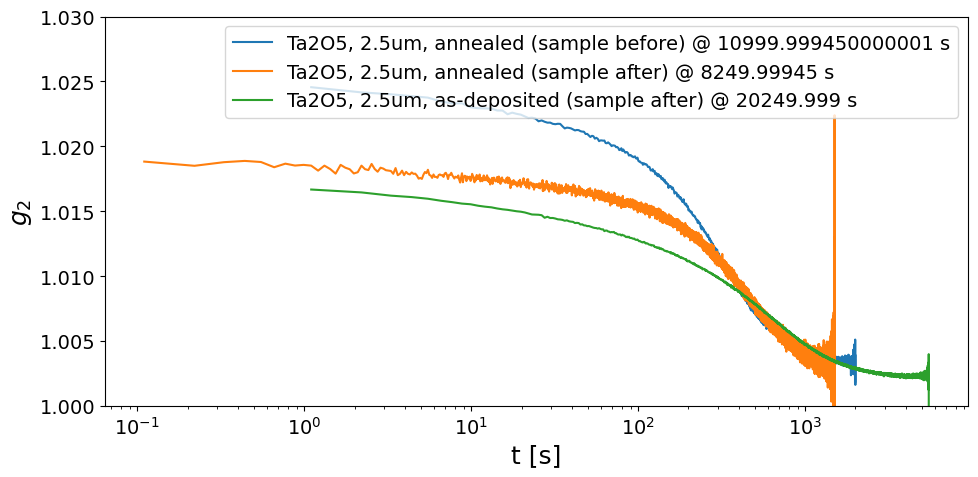

In [55]:
#########################
idx_1 = 5
idx_2 = 5
idx_3 = 5
#########################
plt.figure(figsize=(10,5))

x, y ,t =  list(t_g2['Ta2O5_2.5um_0002_0004'].values())[idx_1], list(g2['Ta2O5_2.5um_0002_0004'].values())[idx_1], list(t_g2['Ta2O5_2.5um_0002_0004'].keys())[idx_1]
plt.plot(x, y,     label='Ta2O5, 2.5um, annealed (sample before) @ '+str(t)+' s')
x, y, t =  list(t_g2['Ta2O5_2.5um_0003_0009'].values())[idx_2], list(g2['Ta2O5_2.5um_0003_0009'].values())[idx_2], list(t_g2['Ta2O5_2.5um_0003_0009'].keys())[idx_2]
plt.plot(x, y,     label='Ta2O5, 2.5um, annealed (sample after) @ '+str(t)+' s')
x, y, t =  list(t_g2['Ta2O5_2.5um_asdep_0001_0006'].values())[idx_3], list(g2['Ta2O5_2.5um_asdep_0001_0006'].values())[idx_3], list(t_g2['Ta2O5_2.5um_asdep_0001_0006'].keys())[idx_3]
plt.plot(x, y,     label='Ta2O5, 2.5um, as-deposited (sample after) @ '+str(t)+' s')

plt.xlabel(r't [s]')
plt.ylabel(r'$g_2$')
plt.legend()
plt.xscale('log')
plt.ylim(1.0,1.03)
plt.tight_layout(), plt.show();